## Install dependencies

In [107]:
import numpy as np
from scipy.linalg import solve_discrete_are
import pypoman

In [31]:
from reach_lp.mpc import control_mpc, control_linear
from reach_lp.sim import run_simulation
from reach_lp.nn import load_model, control_nn
from reach_lp.reach_lp import reachLP_1, reachLP_n, init_state_range_to_polytope
from reach_lp.reach_sdp import reachSDP_n

## Dynamics

In [225]:
# Dynamics
# Double integrator
At = np.array([[1, 1],[0, 1]])
bt = np.array([[0.5], [1]])
ct = np.array([0., 0.]).T
num_states, num_inputs = bt.shape

init_state_range = np.array([
                      [2.5, 3.0],
                      [-0.25, 0.25]
])
goal_state_range = np.array([
                      [-0.25, 0.25],
                      [-0.25, 0.25]            
])

# Sampling & simulation time
dt = 1.0
t_max = 6

Q = np.eye(2)
R = 1
Pinf = solve_discrete_are(At, bt, Q, R)

# u_min = -5; u_max = 5
u_min = -1; u_max = 1



Loaded model from disk


100%|██████████| 100/100 [00:01<00:00, 73.93it/s]


ValueError: LP optimum not found: dual infeasible

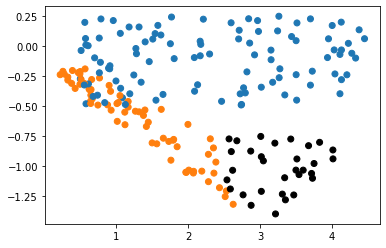

In [284]:
from importlib import reload
import reach_lp
reload(reach_lp.reach_lp)
from reach_lp.reach_lp import reachLP_1, reachLP_n, init_state_range_to_polytope
reload(reach_lp.nn)
reload(reach_lp.nn_bounds)
reload(reach_lp.sim)
from reach_lp.nn import load_model
from reach_lp.sim import run_simulation
reload(reach_lp.reach_sdp)
from reach_lp.reach_sdp import reachSDP_n

model = load_model()

init_state_range = np.array([
                      [0.5, 4.5],
                      [-0.5, 0.25]
    ])
A_inputs, b_inputs = init_state_range_to_polytope(init_state_range)

all_A_out = []
all_all_bs = []
# A_out_LP = np.vstack([A_inputs[:4,:], np.array([[-1,-1],[1,-1], [-1,1], [1,1]])])
# all_A_out.append(A_out_LP)

def get_polytope_A(num):
    theta = np.linspace(0,2*np.pi,num=num)
    A_out = np.dstack([np.cos(theta), np.sin(theta)])[0][:-1]
    return A_out
    
all_A_out.append(get_polytope_A(7))
# all_A_out.append(get_polytope_A(9))
# all_A_out.append(get_polytope_A(5))

t_max = 1
for A_out in all_A_out:
    all_bs = reachLP_n(t_max, model, A_inputs, b_inputs, At, bt, ct, A_out, u_limits=[u_min, u_max])
    all_all_bs.append(all_bs)

all_A_out.append(all_A_out[0])
all_bs = reachLP_n(t_max, model, A_inputs, b_inputs, At, bt, ct, A_out)
all_all_bs.append(all_bs)

# SDP (pre-solved)
sdp_output_polytope_A = get_polytope_A(5)
# all_bs = reachSDP_n(t_max, model, A_inputs, b_inputs, At, bt, ct, sdp_output_polytope_A, u_min=u_min, u_max=u_max)
# sdp_all_bs_small_unbounded = all_bs.copy()
# sdp_all_bs_large_unbounded = all_bs.copy()

# sdp_all_bs = sdp_all_bs_large
# sdp_all_bs = sdp_all_bs_small
# sdp_all_bs = sdp_all_bs_small_unbounded
sdp_all_bs = sdp_all_bs_large_unbounded

# all_A_out.append(sdp_output_polytope_A)
# all_all_bs.append(sdp_all_bs)

run_simulation(At, bt, ct, dt,
           t_max, init_state_range, goal_state_range,
           u_min, u_max, num_states,
           collect_data=False,
           show_bounds=True, all_bs=all_all_bs, A_in=all_A_out, bnd_colors=['g','b','c','r'],
           model=model,
           save_plot=False,
        num_samples = 100, clip_control=True, show_dataset=False)

Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk


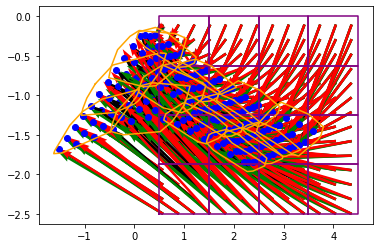

In [187]:
import matplotlib.pyplot as plt
reload(reach_lp.nn)
reload(reach_lp.nn_bounds)
from reach_lp.nn import load_model, control_nn
reload(reach_lp.reach_lp)
from reach_lp.reach_lp import min_and_max_controls

fig, ax = plt.subplots()

# print(all_all_bs[0][0])
# all_all_bs[0]

X = np.linspace(-1, 5, num=20)
Y = np.linspace(-2.5, 1.0, num=20)
U, V = np.meshgrid(X, Y)

def get_next_state(xt, ut, At, bt, ct):
    return np.dot(At, xt.T) + np.dot(bt,ut.T)

init_state_range = np.array([
                      [0.5, 4.5],
                      [-2.5, 0.0]
    ])
A_inputs, b_inputs = init_state_range_to_polytope(init_state_range)

num_x0 = 4; num_x1 = 4
for i in range(num_x0):
    for j in range(num_x1):
        x0_slope = (init_state_range[0][1] - init_state_range[0][0])/num_x0
        x1_slope = (init_state_range[1][1] - init_state_range[1][0])/num_x1
        init_state_range_ = np.array([[init_state_range[0][0]+x0_slope*i, init_state_range[0][0]+x0_slope*(i+1)],
                                    [init_state_range[1][0]+x1_slope*j, init_state_range[1][0]+x1_slope*(j+1)]])
        A_inputs, b_inputs = init_state_range_to_polytope(init_state_range_)
        
        A_to_start = A_inputs
        b_to_start = b_inputs
        A_to_end = get_polytope_A(30)
        # A_to_start = all_A_out[0]
        # b_to_start = all_all_bs[0][0]
        # A_to_end = all_A_out[0]
        # b_to_end = all_all_bs[0][1]

        t_max = 1
        b_to_end = reachLP_n(t_max, model, A_to_start, b_to_start, At, bt, ct, A_to_end)[0]

        pts = np.reshape(np.dstack([U, V]), (-1,2))
        tmp = np.all(np.dot(A_to_start, pts.T).T <= b_to_start, axis=1)
        pts = pts[tmp]

        us = control_nn(pts)

        # pi_l, pi_u = min_and_max_controls(pts, all_A_out[0], all_all_bs[0][0], At, bt, ct, None)
        pi_l, pi_u = min_and_max_controls(pts, A_to_start, b_to_start, At, bt, ct, None)

        # print(np.hstack([pi_l, us, pi_u]))

        next_states = get_next_state(pts, us, At, bt, ct)
        next_states_l = get_next_state(pts, pi_l, At, bt, ct)
        next_states_u = get_next_state(pts, pi_u, At, bt, ct)
        delta_state = next_states - pts.T
        delta_state_l = next_states_l - pts.T
        delta_state_u = next_states_u - pts.T

        q = ax.quiver(pts[:,0], pts[:,1], delta_state[0,:], delta_state[1,:], angles='xy', scale_units='xy', scale=1.)
        q = ax.quiver(pts[:,0], pts[:,1], delta_state_l[0,:], delta_state_l[1,:], angles='xy', scale_units='xy', scale=1., color='green')
        q = ax.quiver(pts[:,0], pts[:,1], delta_state_u[0,:], delta_state_u[1,:], angles='xy', scale_units='xy', scale=1., color='red')

        vertices = pypoman.compute_polygon_hull(A_to_start, b_to_start)
        bnd_color = 'purple'
        plt.plot([v[0] for v in vertices]+[vertices[0][0]], [v[1] for v in vertices]+[vertices[0][1]], bnd_color)

        vertices = pypoman.compute_polygon_hull(A_to_end, b_to_end)
        bnd_color = 'orange'
        plt.plot([v[0] for v in vertices]+[vertices[0][0]], [v[1] for v in vertices]+[vertices[0][1]], bnd_color)

        plt.scatter(next_states[0,:], next_states[1,:], color='blue')

plt.show()

In [157]:
pi_l

array([[-0.64],
       [-0.75],
       [-0.86],
       [-0.74],
       [-0.84],
       [-0.95],
       [-0.72],
       [-0.83],
       [-0.93],
       [-1.04],
       [-0.92],
       [-1.03]])

## Run reach sdp on a few network sizes


100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

100%|██████████| 100/100 [00:00<00:00, 310.23it/s]


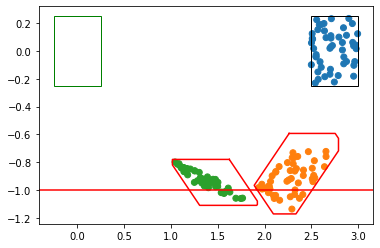


100%|██████████| 8/8 [00:10<00:00,  1.31s/it]

100%|██████████| 8/8 [00:10<00:00,  1.33s/it]

100%|██████████| 100/100 [00:00<00:00, 318.38it/s]


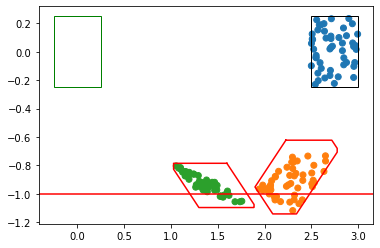


100%|██████████| 8/8 [00:17<00:00,  2.18s/it]

100%|██████████| 8/8 [00:18<00:00,  2.32s/it]

100%|██████████| 100/100 [00:00<00:00, 312.55it/s]


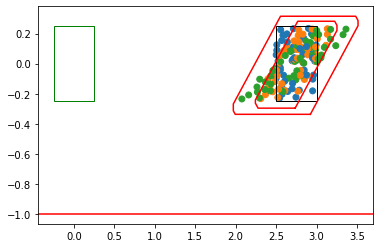


100%|██████████| 8/8 [00:19<00:00,  2.50s/it]

100%|██████████| 8/8 [00:18<00:00,  2.30s/it]

100%|██████████| 100/100 [00:00<00:00, 349.78it/s]


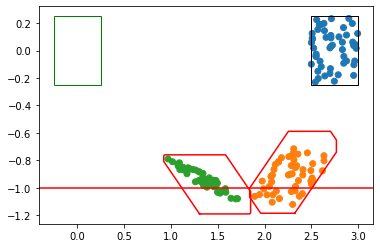


100%|██████████| 8/8 [00:12<00:00,  1.54s/it]

100%|██████████| 8/8 [00:12<00:00,  1.56s/it]

100%|██████████| 100/100 [00:00<00:00, 341.49it/s]


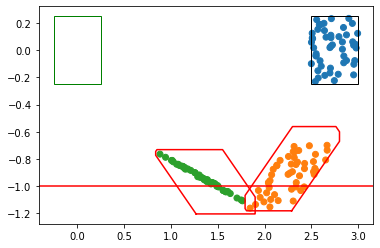

In [39]:
all_neurons_per_layer = [
  [10,5],
#   # [8,5],
#   # [6,5],
#   # [4,5],
#   # [2,5],
#   [2,2],
#   [2,4],
#   [2,6],
#   [2,8],
#   [2,5],
]

t_max = 2

for neurons_per_layer in all_neurons_per_layer:
  plot_name = '_'.join(str(x).zfill(3) for x in neurons_per_layer)+'_reach_sdp_'+str(t_max)+'.png'
  model = create_and_train_model(neurons_per_layer, xs, us)
  all_bs = reachSDP_n(t_max, model, A_inputs, b_inputs, At, bt, ct, A_in)

  run_simulation(At, bt, ct,
               t_max, init_state_range, goal_state_range,
               u_min, u_max, num_states,
               collect_data=False,
               show_bounds=True, all_bs=all_bs, A_in=A_in,
               model=model,
               save_plot=True,
               plot_name=plot_name)


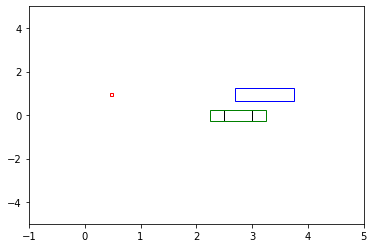

In [57]:
At_xt_max = np.empty((num_states,))
At_xt_min = np.empty((num_states,))
bt_ut_max = np.empty((num_states,))
bt_ut_min = np.empty((num_states,))
xt1_max = np.empty((num_states,))
xt1_min = np.empty((num_states,))

u_min_ = 0.9
u_max_ = 1.0

for state in range(num_states):
  At_xt_max[state] = np.max(At[state,0]*init_state_range[0,:]) + np.max(At[state,1]*init_state_range[1,:])
  At_xt_min[state] = np.min(At[state,0]*init_state_range[0,:]) + np.min(At[state,1]*init_state_range[1,:])

  bt_ut_max[state] = np.max(bt[state]*np.array([u_min_, u_max_]))
  bt_ut_min[state] = np.min(bt[state]*np.array([u_min_, u_max_]))

  xt1_max[state] = At_xt_max[state]+bt_ut_max[state]
  xt1_min[state] = At_xt_min[state]+bt_ut_min[state]

# Input state rectangle
rect = ptch.Rectangle(init_state_range[:,0],
                      init_state_range[0,1]-init_state_range[0,0], 
                      init_state_range[1,1]-init_state_range[1,0],
                      fill=False, ec='k')
plt.gca().add_patch(rect)

# Goal state rectangle
rect = ptch.Rectangle(At_xt_min,
                      At_xt_max[0]-At_xt_min[0],
                      At_xt_max[1]-At_xt_min[1],
                      fill=False, ec='green')
plt.gca().add_patch(rect)

rect = ptch.Rectangle(bt_ut_min,
                      bt_ut_max[0]-bt_ut_min[0],
                      bt_ut_max[1]-bt_ut_min[1],
                      fill=False, ec='red')
plt.gca().add_patch(rect)

rect = ptch.Rectangle(xt1_min,
                      xt1_max[0]-xt1_min[0],
                      xt1_max[1]-xt1_min[1],
                      fill=False, ec='blue')
plt.gca().add_patch(rect)

plt.gca().set_xlim([-1,5])
plt.gca().set_ylim([-5,5])

plt.show()


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 264.85it/s]


TypeError: 'numpy.bool_' object is not iterable

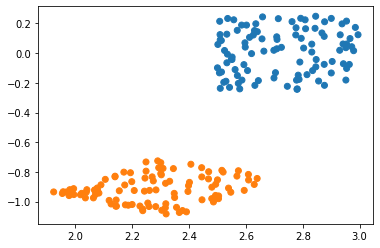

In [31]:
t_max = 1
neurons_per_layer = [10,5]
plot_name = '_'.join(str(x).zfill(3) for x in neurons_per_layer)+'_reach_sdp_'+str(t_max)+'.png'
# model = create_and_train_model(neurons_per_layer, xs, us)
all_bs = reachSDP_n(t_max, model, A_inputs, b_inputs, At, bt, ct, A_in, u_min, u_max)

run_simulation(At, bt, ct,
           t_max, init_state_range, goal_state_range,
           u_min, u_max, num_states,
           collect_data=False,
           show_bounds=True, all_bs=all_bs, A_in=A_in,
           model=model,
           save_plot=True,
           plot_name=plot_name)

## Extras

In [0]:
# Generate a random SDP.
n = 3
p = 3
np.random.seed(1)
C = np.random.randn(n, n)
A = []
b = []
for i in range(p):
    A.append(np.random.randn(n, n))
    b.append(np.random.randn())

# Define and solve the CVXPY problem.
# Create a symmetric matrix variable.
X = cp.Variable((n,n), symmetric=True)
# The operator >> denotes matrix inequality.
constraints = [X >> 0]
# constraints = []
constraints += [
    mat_constr(i=0,j=0,val=1.,mat=X),
    mat_constr(i=0,j=1,val=2.,mat=X),
    mat_constr(i=0,j=2,val=3.,mat=X),
    mat_constr(i=1,j=1,val=4.,mat=X),
    # mat_constr(i=1,j=2,val=5.,mat=X),
    # mat_constr(i=2,j=2,val=6.,mat=X),
    # cp.trace(A[i] @ X) == b[i] for i in range(p)
]

# A__ = np.zeros((n,n))
# A__[0,0] = 1
# b__ = 5

# print(cp.trace(A__ @ X))

# constraints.append(cp.trace(A__ @ X) == b__)
# prob = cp.Problem(cp.Minimize(cp.trace(X)),
prob = cp.Problem(cp.Minimize(X[1,2]),
                  constraints)
prob.solve()

# Print result.
print("The optimal value is", prob.value)
print("A solution X is")
print(X.value)
print(np.linalg.eig(X.value)[0])

The optimal value is -25.890119296848887
A solution X is
[[ 1.0e+00  2.0e+00  3.0e+00]
 [ 2.0e+00  4.0e+00 -2.6e+01]
 [ 3.0e+00 -2.6e+01  2.9e+09]]
[ 2.9e+09 -2.8e-03  5.0e+00]


In [0]:
P = cp.Variable((num_states+1, num_states+1), symmetric=True)
Gamma = cp.Variable((m,m), symmetric=True)
Gamma2 = cp.Variable((m,m), nonneg=True)

input_set_constrs = []

for i,j in itertools.combinations_with_replacement(range(m),2):
  input_set_constrs += [
    # Ensure each term in Gamma >= 0
    mat_constr(i=i,j=j,val=Gamma2[i,j],mat=Gamma)
  ]

input_set_constrs += [
  mat_constr(i=0,j=0,val=cp.quad_form(A_inputs, Gamma)[0,0],mat=P),
  mat_constr(i=0,j=1,val=cp.quad_form(A_inputs, Gamma)[0,1],mat=P),
  mat_constr(i=1,j=1,val=cp.quad_form(A_inputs, Gamma)[1,1],mat=P),
  mat_constr(i=0,j=2,val=(-A_inputs.T*Gamma*b_inputs)[0],mat=P),
  mat_constr(i=1,j=2,val=(-A_inputs.T*Gamma*b_inputs)[1],mat=P),
  mat_constr(i=2,j=2,val=cp.quad_form(b_inputs, Gamma),mat=P),
  # mat_constr(i=2,j=2,val=
  #            cp.quad_form(np.array([0.5, 0.6, 0.8, 0.9]),Gamma),
  #           mat=P),
  ]

prob = cp.Problem(cp.Minimize(cp.trace(P)),
                  input_set_constrs)
print(prob.solve())
print(prob.status)
print(Gamma.value)

-inf
unbounded
None


In [0]:
nn_constrs = []

# Set up T
# d = num_neurons+2*num_inputs
d = 4
T = cp.Variable((d,d), PSD=True)
lamb_ij = cp.Variable((d,d), nonneg=True)
lamb_i = cp.Variable((d))
pairs = list(itertools.combinations(range(d), 2))

for i in range(d):
  if i == 0:
    first = 0
  else:
    # first = '+'.join(['l_ij['+str(j)+','+str(i)+']' for j in range(0,i)])
    first = cp.sum(lamb_ij[:i,i])
  if i == d-1:
    second = 0
  else:
    # second = '+'.join(['l_ij['+str(i)+','+str(j)+']' for j in range(i+1,d)])
    second = cp.sum(lamb_ij[i, i+1:])
  val = first+second+lamb_i[i]
  # val = cp.sum(lamb_ij[i,:])-lamb_ij[i,i]+lamb_i[i]
  nn_constrs += [mat_constr(i=i,j=i,val=val,mat=T)]

for i,j in pairs:
  val = -lamb_ij[i,j]
  nn_constrs += [mat_constr(i=i,j=j,val=val,mat=T)]

prob = cp.Problem(cp.Minimize(cp.trace(T)),
                  nn_constrs)
print(prob.solve())
print(prob.status)
print(T.value)

0 1
0 2
0 3
1 2
1 3
2 3
3.487714783831201e-13
optimal
[[8.7e-14 6.1e-15 6.1e-15 6.1e-15]
 [6.1e-15 8.7e-14 6.1e-15 6.1e-15]
 [6.1e-15 6.1e-15 8.7e-14 6.1e-15]
 [6.1e-15 6.1e-15 6.1e-15 8.7e-14]]


In [0]:
d = 4
T = np.empty((d,d), dtype=object)
pairs = list(itertools.combinations(range(d), 2))

for (i,j) in itertools.product(range(d),repeat=2):
  T[i,j] = ''

for i in range(d):
  if i == 0:
    first = ''
  else:
    first = '+'.join(['l_ij['+str(j)+','+str(i)+']' for j in range(0,i)])
  if i == d-1:
    second = ''
  else:
    second = '+'.join(['l_ij['+str(i)+','+str(j)+']' for j in range(i+1,d)])
  T[i,i] += 'l_'+str(i)+'+'+first+second

for i,j in pairs:
  T[i,j] += '-l_ij['+str(i)+','+str(j)+']'
  # val = -lamb_ij[i,j]

print(T)



[['l_0+l_ij[0,1]+l_ij[0,2]+l_ij[0,3]' '-l_ij[0,1]' '-l_ij[0,2]'
  '-l_ij[0,3]']
 ['' 'l_1+l_ij[0,1]l_ij[1,2]+l_ij[1,3]' '-l_ij[1,2]' '-l_ij[1,3]']
 ['' '' 'l_2+l_ij[0,2]+l_ij[1,2]l_ij[2,3]' '-l_ij[2,3]']
 ['' '' '' 'l_3+l_ij[0,3]+l_ij[1,3]+l_ij[2,3]']]


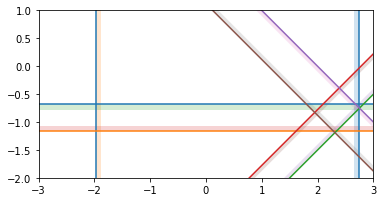

In [0]:
def plot(A, b):
  fill=0.1
  alpha=0.2
  xlim = [-3,3]
  ylim = [-2,1]
  num_planes = A.shape[0]
  for i in range(num_planes):
    if A[i,1] == 0:
      plt.axvline(x=b[i])
      if A[i,0] > 0:
        fill_ = -fill
      else:
        fill_ = fill
      plt.fill_betweenx(ylim,b[i],x2=b[i]+fill_,alpha=alpha)
    else:
      x0 = np.linspace(-5.,5.,num=2)
      x1 = (b[i]-x0*A[i,0])/A[i,1]
      plt.plot(x0, x1)
      if A[i,1] > 0:
        fill_ = -fill
      else:
        fill_ = fill
      plt.fill_between(x0,x1,x1+fill_,alpha=alpha)
  plt.gca().set_xlim(xlim)
  plt.gca().set_ylim(ylim)
  plt.gca().set_aspect('equal')
  plt.show()

plot(A_in,bs)